In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [238]:
import seaborn as sns
from datetime import datetime
from sklearn.feature_selection import RFE

In [239]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [292]:
bank_data= pd.read_csv('creditcard.csv')

In [293]:
bank_data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [241]:
bank_data.shape

(284807, 31)

In [242]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [243]:
bank_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [244]:
bank_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the distribution we can see that the data is highly inbalances so so to get a better result we have to balance the dataset , we are under sampling the normal data to match the value of fraud data. Upsampling might be used to get more accuracy but it will algo add dummy data, which might be risky for something as sensity as fraud detection .

In [245]:
bank_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [246]:
bank_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


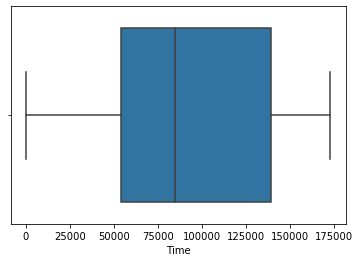

In [247]:
sns.boxplot(bank_data['Time'])

The time column is the time difference in seconds from the first transaction , we can see if there is any seasonality in the data , if we convert the seconds into date time format

In [248]:
def convert_time(time):
    return datetime.fromtimestamp(time).strftime("%A, %B %d, %Y %I:%M:%S")

In [249]:
bank_data['date_tie']=bank_data['Time'].apply(lambda x : convert_time(x))

In [250]:
bank_data['date_tie']=pd.to_datetime(bank_data['date_tie'])

In [251]:
bank_data['year']=bank_data['date_tie'].dt.year
bank_data['month']=bank_data['date_tie'].dt.month_name()
bank_data['day']=bank_data['date_tie'].dt.day_name()
bank_data['time']=bank_data['date_tie'].dt.time

In [252]:
timedelta = pd.to_timedelta(bank_data['Time'], unit='s')
bank_data['Time_hour'] = (timedelta.dt.components.hours).astype(int)
bank_data['Time_day'] = (timedelta.dt.components.days).astype(int)

In [294]:
bank_data['Time_day'] = (timedelta.dt.components.days).astype(int)

In [295]:
set(bank_data['Time_day'])

{0, 1}

In [253]:
print("year : ",(set(bank_data['day'])))

year :  {'Thursday', 'Saturday', 'Friday'}


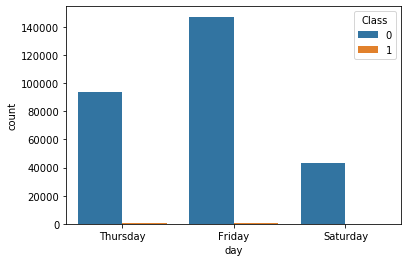

In [254]:
sns.countplot(data=bank_data,x='day',hue='Class')

In [255]:
bank_data_fraud=bank_data[bank_data['Class']==1]
bank_data_normal=bank_data[bank_data['Class']==0]

Under sampling the data by taking 492 randoms amples from normal transaction data 

In [256]:
bank_data_normal=bank_data_normal.sample(n=492,random_state=142)

In [257]:
bank_data_normal.shape

(492, 37)

In [258]:
bank_data_fraud.shape

(492, 37)

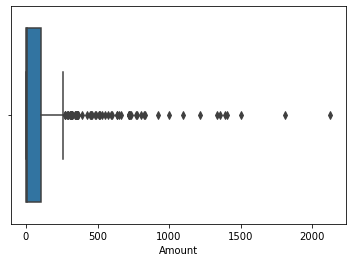

In [259]:
sns.boxplot(bank_data_fraud['Amount'])

In [260]:
bank_data_undersampled = pd.concat([bank_data_fraud, bank_data_normal])

In [261]:
bank_data_undersampled.shape

(984, 37)

dividing date time into  year , month , day and time 

In [262]:
bank_data_undersampled['year']=bank_data_undersampled['date_tie'].dt.year
bank_data_undersampled['month']=bank_data_undersampled['date_tie'].dt.month_name()
bank_data_undersampled['day']=bank_data_undersampled['date_tie'].dt.day_name()
bank_data_undersampled['time']=bank_data_undersampled['date_tie'].dt.time

In [263]:
print("year : ",(set(bank_data_undersampled['year'])))
print("month : ",(set(bank_data_undersampled['month'])))
print("day : ",(set(bank_data_undersampled['day'])))


year :  {1970}
month :  {'January'}
day :  {'Thursday', 'Saturday', 'Friday'}


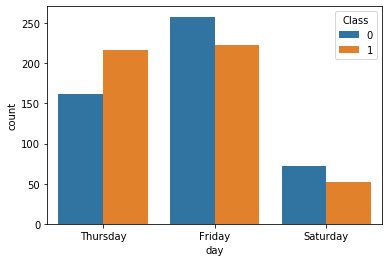

In [264]:
sns.countplot(data=bank_data_undersampled,x='day',hue='Class')

We can see that the fraud data happened consecutive 3 days .probably during a vacation or weekend when there is low amount of staff 

In [265]:
bank_data_undersampled.time

541       06:06:46
623       06:07:52
4920      07:14:22
6108      07:56:26
6329      08:05:19
            ...   
177329    04:12:12
83918     10:41:27
147797    06:43:21
210035    08:16:51
7378      08:45:48
Name: time, Length: 984, dtype: object

In [266]:
bank_data_undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,date_tie,year,month,day,time,Time_hour
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.261145,-0.143276,0.00,1,1970-01-01 06:06:46,1970,January,Thursday,06:06:46,0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,-0.252773,0.035764,529.00,1,1970-01-01 06:07:52,1970,January,Thursday,06:07:52,0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,0.039566,-0.153029,239.93,1,1970-01-01 07:14:22,1970,January,Thursday,07:14:22,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.827136,0.849573,59.00,1,1970-01-01 07:56:26,1970,January,Thursday,07:56:26,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.010016,0.146793,1.00,1,1970-01-01 08:05:19,1970,January,Thursday,08:05:19,2


In [267]:
bank_data_undersampled['hour']=bank_data_undersampled['date_tie'].dt.hour

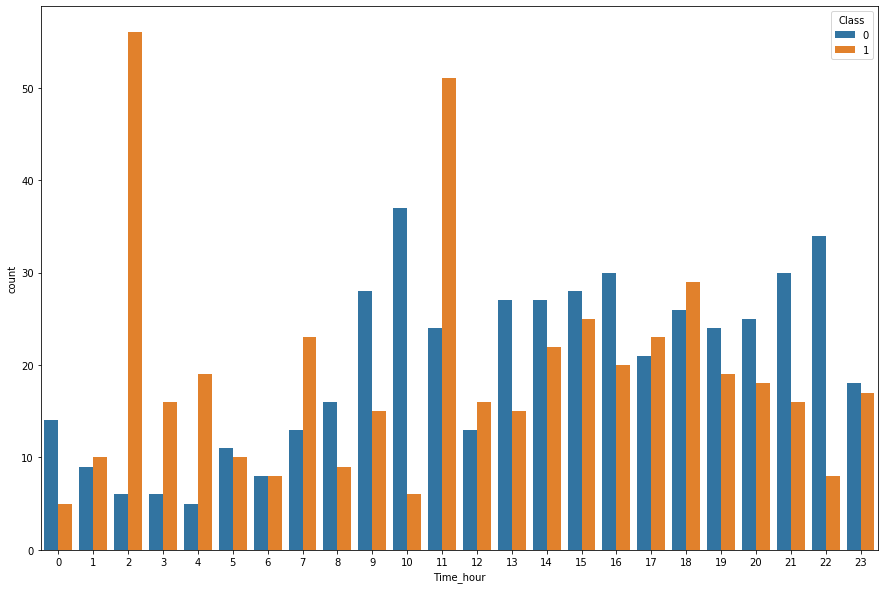

In [296]:
plt.figure(figsize=(15,10))
sns.countplot(data=bank_data_undersampled,x='Time_hour',hue='Class')

In [269]:
bank_data_undersampled['time'].max()

datetime.time(12, 59, 58)

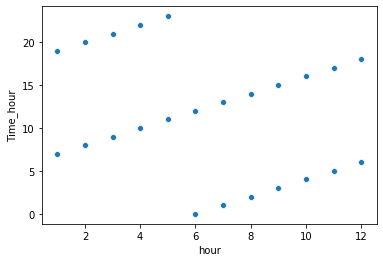

In [270]:
sns.scatterplot(x='hour',y='Time_hour',data=bank_data_undersampled)

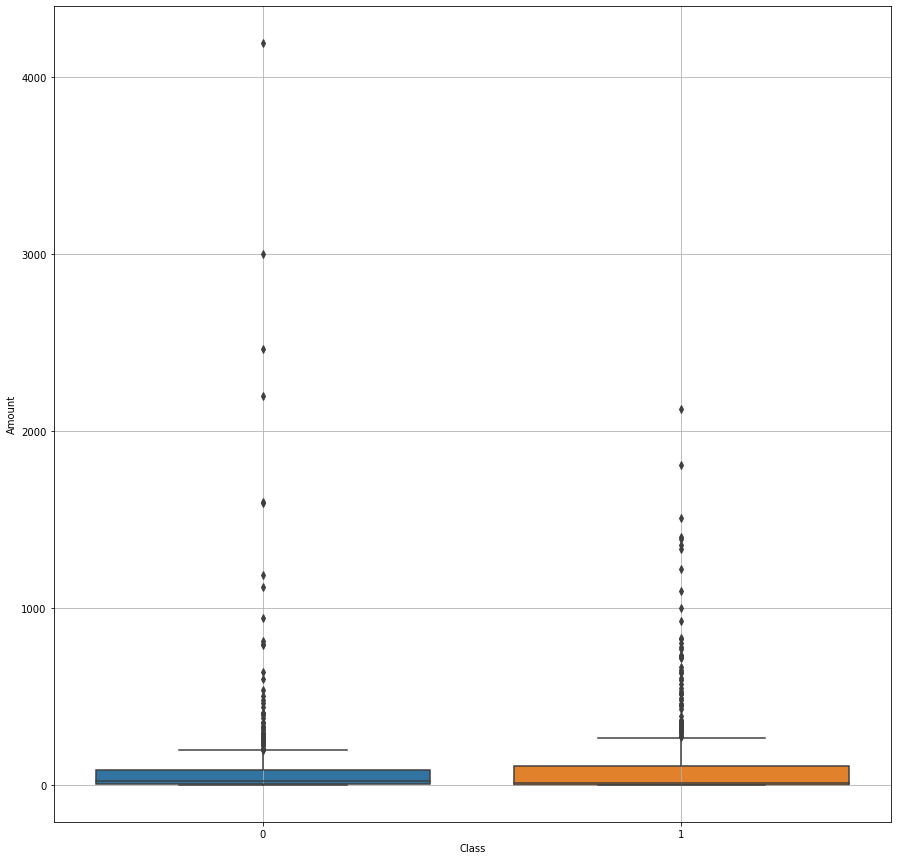

In [271]:
# sns.boxplot(bank_data_undersampled['Amount'])
plt.figure(figsize=(15,15))
sns.boxplot(x=bank_data_undersampled['Class'], y=bank_data_undersampled['Amount'])
plt.grid()

There are lot of outliers in the data, it can also be seen that most fraud transactions are of small amount.

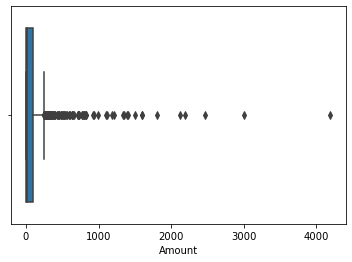

In [272]:
sns.boxplot(bank_data_undersampled['Amount'])

In [273]:
bank_data_undersampled=bank_data_undersampled[bank_data_undersampled['Amount']<1000]

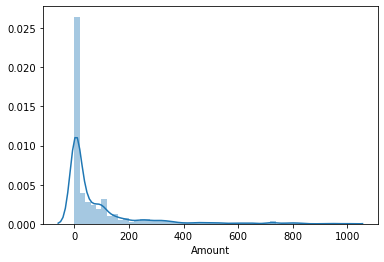

In [274]:
sns.distplot(bank_data_undersampled['Amount'])

In [275]:
bank_data_undersampled=bank_data_undersampled[bank_data_undersampled['Amount'] !=0]
bank_data_undersampled['Amount'] = np.log(bank_data_undersampled.Amount)

In [276]:
set(bank_data_undersampled['Amount'])

{-4.605170185988091,
 -2.3025850929940455,
 -1.6094379124341003,
 -1.2039728043259361,
 -0.9675840262617056,
 -0.3856624808119846,
 -0.37106368139083207,
 -0.2744368457017603,
 -0.2613647641344075,
 -0.18632957819149348,
 -0.11653381625595151,
 -0.10536051565782628,
 -0.08338160893905101,
 -0.030459207484708574,
 -0.01005033585350145,
 0.0,
 0.09531017980432493,
 0.16551443847757333,
 0.20701416938432612,
 0.25464221837358075,
 0.3293037471426003,
 0.37843643572024505,
 0.3987761199573678,
 0.4054651081081644,
 0.412109650826833,
 0.41871033485818504,
 0.4637340162321402,
 0.4762341789963717,
 0.4885800148186709,
 0.5596157879354227,
 0.5766133643039938,
 0.5822156198526637,
 0.6097655716208943,
 0.6418538861723947,
 0.6830968447064438,
 0.6931471805599453,
 0.7514160886839212,
 0.7975071958841882,
 0.8197798314933114,
 0.8241754429663494,
 0.8544153281560676,
 0.8878912573524571,
 0.9042181506398859,
 0.9516578757114463,
 0.9895411936137477,
 1.095273387402595,
 1.0986122886681098,
 1

We can remove Amounts greater than 1000

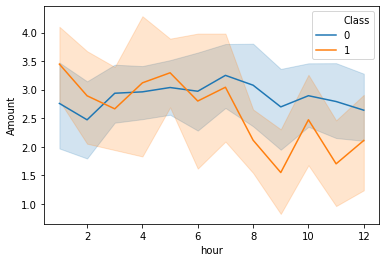

In [277]:
sns.lineplot(data=bank_data_undersampled, x="hour", y="Amount",hue='Class')

We can see there is no corlation between class and amount 

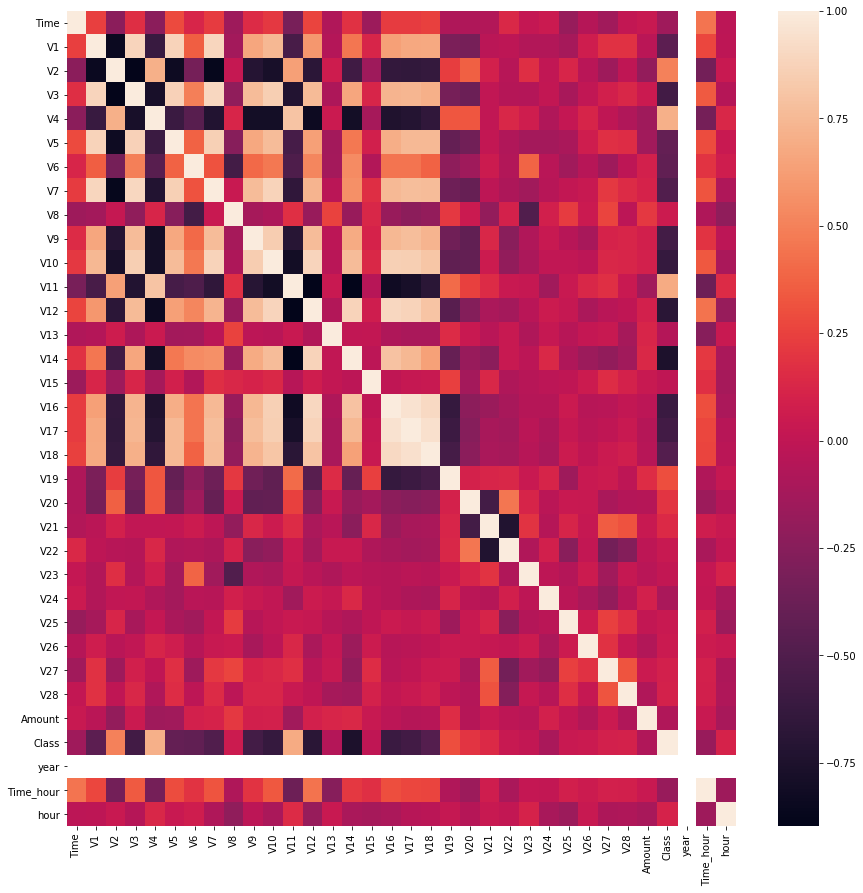

In [278]:
corr = bank_data_undersampled.corr()
plt.figure(figsize=(15,15))
chart=sns.heatmap(corr)


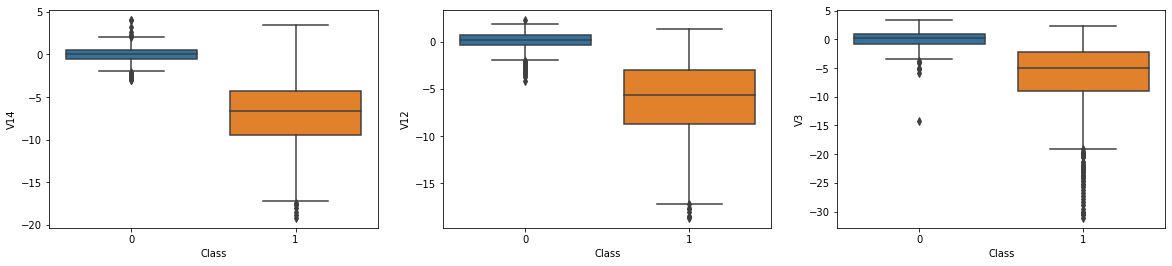

In [279]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Class", y="V14", data=bank_data_undersampled, ax=axes[0])

sns.boxplot(x="Class", y="V12", data=bank_data_undersampled,ax=axes[1])

sns.boxplot(x="Class", y="V3", data=bank_data_undersampled,ax=axes[2])

Some negatively colerated data , it can be seen that wehn it come toh V14 ,V12 ,V3 values mostly close to 0 will result in Normal transaction whereas values  close to -5 will result in a fraud 

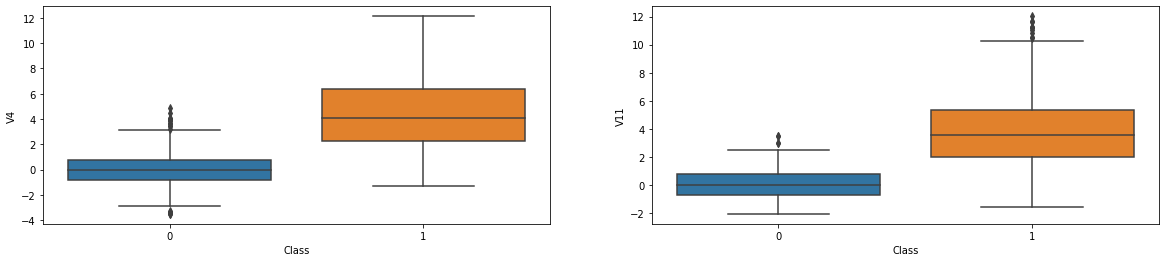

In [280]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(x="Class", y="V4", data=bank_data_undersampled, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=bank_data_undersampled,ax=axes[1])

Some positively colerated data , it can be seen that wehn it come toh V11 and V4 , values mostly close to 0 will result in Normal transaction whereas values  oner 4 will result in negative .

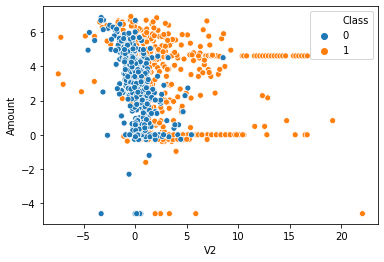

In [281]:

sns.scatterplot(data=bank_data_undersampled,x='V2',y='Amount',hue='Class')

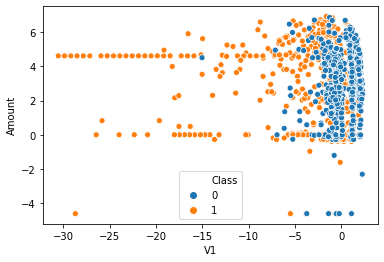

In [282]:
sns.scatterplot(data=bank_data_undersampled,x='V1',y='Amount',hue='Class')

In [283]:
bank_data_undersampled['Amount'] = StandardScaler().fit_transform(bank_data_undersampled['Amount'].values.reshape(-1, 1))
bank_data_undersampled['hour'] = StandardScaler().fit_transform(bank_data_undersampled['hour'].values.reshape(-1, 1))

In [284]:
bank_data_undersampled=bank_data_undersampled.drop(["Time",'date_tie','year','month','day','time','hour'],axis=1)

In [285]:
bank_data_undersampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.581210,1,0
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1.228766,1,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.603437,1,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-1.214205,1,2
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,-1.214205,1,2


In [286]:
labels = bank_data_undersampled.Class
features = bank_data_undersampled.drop('Class', axis=1)

In [287]:

model_arr=[]
accuracy_arr=[]
std_arr=[]
def clf_result(classifier,classifier_name):
    acc_scores = cross_val_score(classifier, features, labels, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True, random_state=142),n_jobs=-1)
    accuracy=acc_scores.mean()
    std=acc_scores.std()
    print("Classifier_name :",classifier_name)
    print("Average accuracy: ",accuracy)
    print("standard dev: ",std)
    model_arr.append(classifier_name)
    accuracy_arr.append(accuracy)
    std_arr.append(std)
    return acc_scores

In [288]:
lgr = LogisticRegression(random_state=142)
lgr_acc=clf_result(lgr,"LogisticRegression")

Classifier_name : LogisticRegression
Average accuracy:  0.9443948753145733
standard dev:  0.020286689918143704


In [289]:
rf=RandomForestClassifier(max_depth=16,n_estimators=250,random_state=142)
rf_acc=clf_result(rf,"Random FOrrest")

Classifier_name : Random FOrrest
Average accuracy:  0.9444291924044841
standard dev:  0.019625108660353364


In [290]:
mlp = MLPClassifier(hidden_layer_sizes=(128),alpha=0.0001,random_state=142)
mlp_acc=clf_result(mlp," MLPClassifier")

Classifier_name :  MLPClassifier
Average accuracy:  0.9443948753145731
standard dev:  0.022374546707111122


In [291]:
sv_c=svm.SVC(random_state=142)
sv_c_acc=clf_result(sv_c," SVM")

Classifier_name :  SVM
Average accuracy:  0.9337108213223517
standard dev:  0.021363885291421813
